In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import numpy as np

file_path = '/content/cmm_data.csv'
data = pd.read_csv(file_path, encoding='cp949')

data.drop("파일명", axis=1, inplace=True)

data = pd.get_dummies(data)

X = data.drop("품질상태", axis=1)
y = data["품질상태"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)
y_pred_prob = gb_clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

Accuracy: 0.6170212765957447
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.88      0.76        95
           1       0.21      0.07      0.10        46

    accuracy                           0.62       141
   macro avg       0.44      0.47      0.43       141
weighted avg       0.52      0.62      0.54       141



시각화

<ipython-input-18-9aea58c43852>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


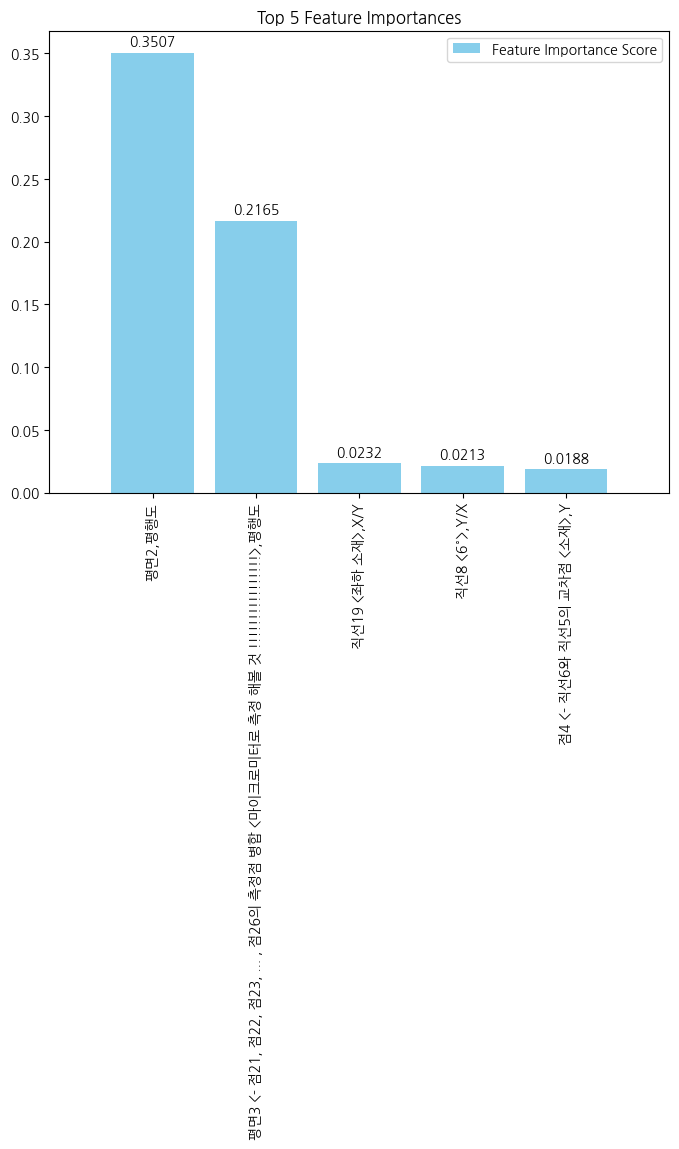

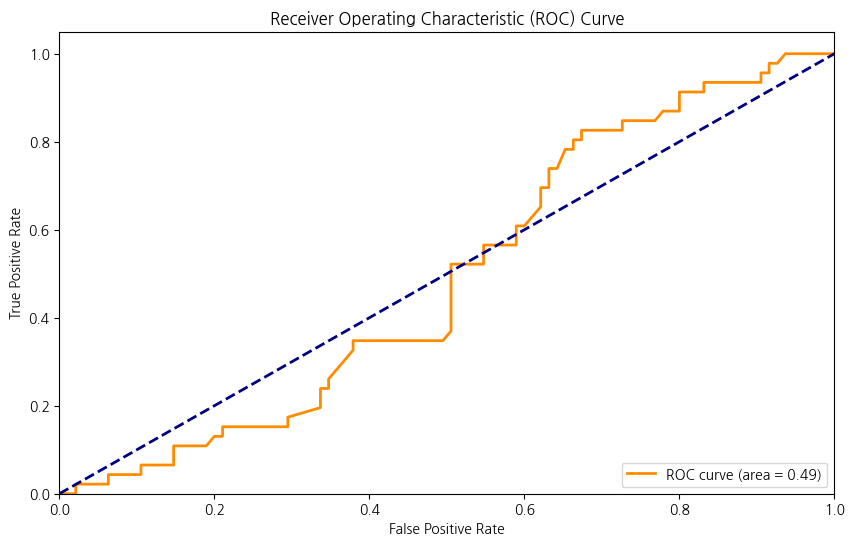

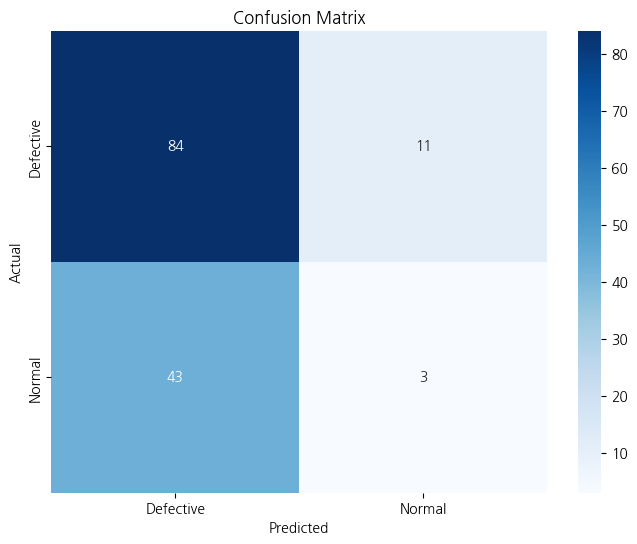

In [ ]:

plt.rcParams['font.sans-serif'] = ['NanumGothic']
plt.rcParams['axes.unicode_minus'] = False

# Feature Importance Plot
feature_importances = gb_clf.feature_importances_
features = X.columns

indices = np.argsort(feature_importances)[::-1][:5]

plt.figure(figsize=(8, 6))
plt.title("Top 5 Feature Importances")

bars = plt.bar(range(5), feature_importances[indices], align="center", color='skyblue')

plt.xticks(range(5), features[indices], rotation=90)
plt.xlim([-1, 5])
plt.tight_layout()

for bar, importance in zip(bars, feature_importances[indices]):
    height = bar.get_height()
    plt.annotate(f'{importance:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.legend(['Feature Importance Score'], loc='upper right')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Defective', 'Normal'], yticklabels=['Defective', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


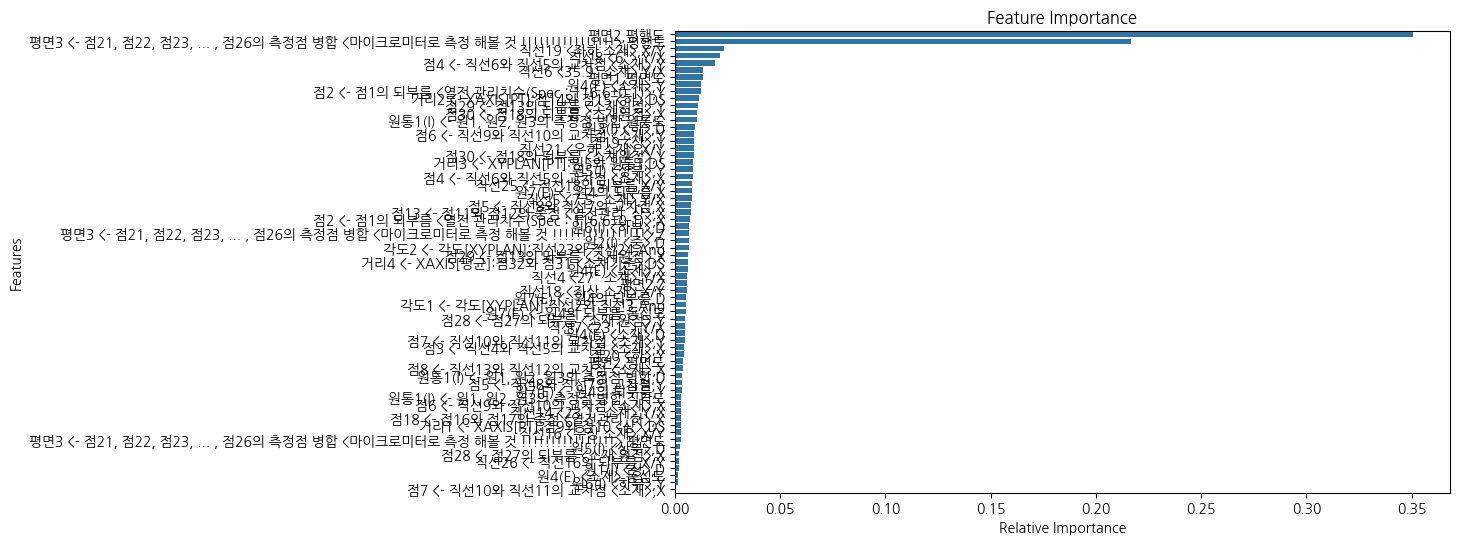

In [ ]:
# Visualizing Feature Importance(ALL)
feature_importance = gb_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()


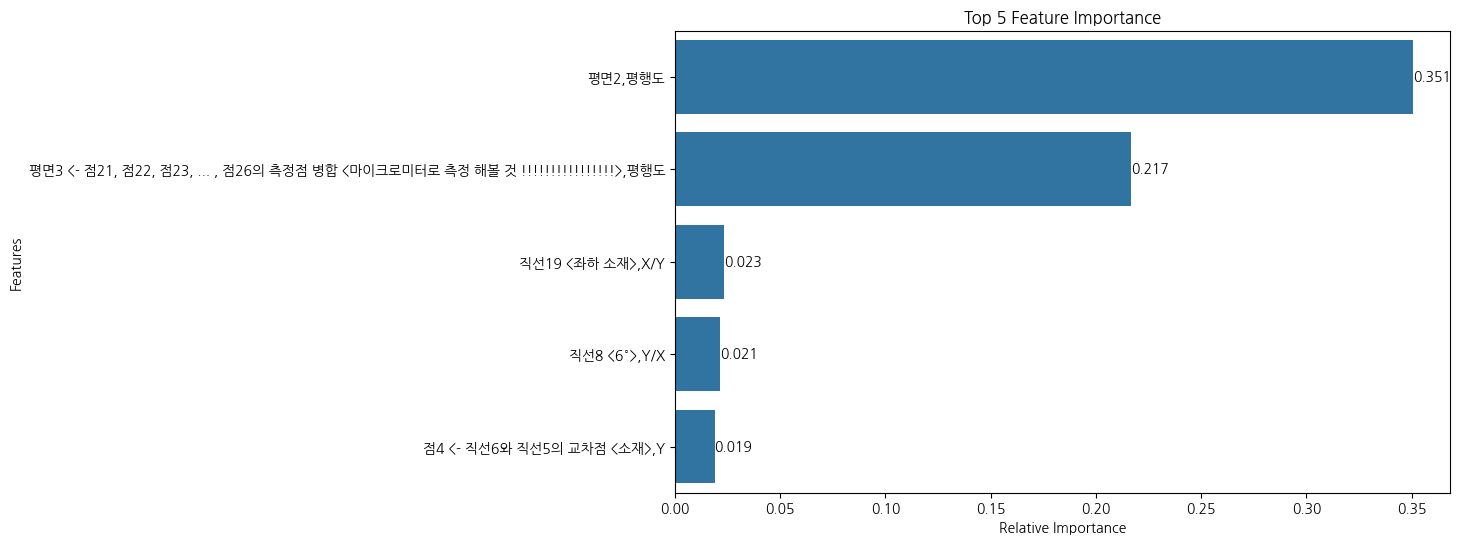

In [ ]:
# Top 5 Feature Importance
feature_importance = gb_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1][:5]  # 상위 5개의 인덱스

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X.columns[sorted_idx])
plt.title('Top 5 Feature Importance')
plt.ylabel('Features')
plt.xlabel('Relative Importance')

# 수치 표시
for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v, i, f'{v:.3f}', color='black', ha='left', va='center')

plt.show()


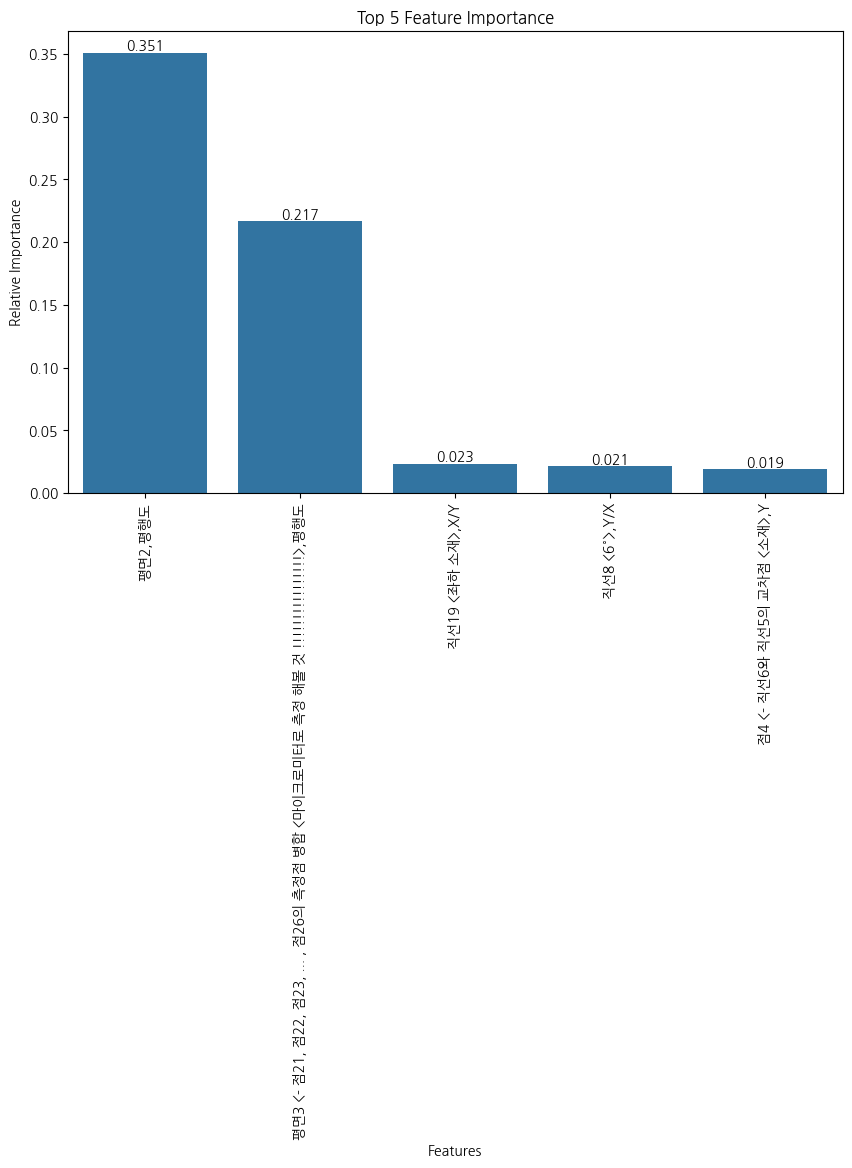

In [ ]:
# Visualizing Top 5 Feature Importance
feature_importance = gb_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1][:5]  # Get the indices of the top 5 features

plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns[sorted_idx], y=feature_importance[sorted_idx])
plt.title('Top 5 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Relative Importance')

# Displaying numbers horizontally
for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(i, v, f'{v:.3f}', color='black', ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()
